In [1]:
#Import Dataframes
import pandas as pd

df = pd.read_csv("time_series_covid19_confirmed_global.csv")
df2 = pd.read_csv("time_series_covid19_deaths_global.csv")
df3 = pd.read_csv("time_series_covid19_recovered_global.csv")

In [2]:
#Lat, Long in allen Droppen
df.drop(['Lat', 'Long'],axis=1, inplace=True)
df2.drop(['Lat', 'Long'],axis=1, inplace=True)
df3.drop(['Lat', 'Long'],axis=1, inplace=True)



df.head()

,Province/State,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,5/13/20,5/14/20,5/15/20,5/16/20,5/17/20,5/18/20,5/19/20,5/20/20,5/21/20,5/22/20
0,NaN,Afghanistan,0,0,0,0,0,0,0,0,...,5226,5639,6053,6402,6664,7072,7653,8145,8676,9216
1,NaN,Albania,0,0,0,0,0,0,0,0,...,880,898,916,933,946,948,949,964,969,981
2,NaN,Algeria,0,0,0,0,0,0,0,0,...,6253,6442,6629,6821,7019,7201,7377,7542,7728,7918
3,NaN,Andorra,0,0,0,0,0,0,0,0,...,760,761,761,761,761,761,761,762,762,762
4,NaN,Angola,0,0,0,0,0,0,0,0,...,45,48,48,48,48,50,52,52,58,60


In [3]:
#Provinzen raus

countries = df.groupby("Country/Region").sum()
countries2 = df2.groupby("Country/Region").sum()
countries3 = df3.groupby("Country/Region").sum()




countries.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,5/13/20,5/14/20,5/15/20,5/16/20,5/17/20,5/18/20,5/19/20,5/20/20,5/21/20,5/22/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,5226,5639,6053,6402,6664,7072,7653,8145,8676,9216
Albania,0,0,0,0,0,0,0,0,0,0,...,880,898,916,933,946,948,949,964,969,981
Algeria,0,0,0,0,0,0,0,0,0,0,...,6253,6442,6629,6821,7019,7201,7377,7542,7728,7918
Andorra,0,0,0,0,0,0,0,0,0,0,...,760,761,761,761,761,761,761,762,762,762
Angola,0,0,0,0,0,0,0,0,0,0,...,45,48,48,48,48,50,52,52,58,60


In [4]:
#Transform Row/Columns

confirmed = countries.T
death = countries2.T
recovered = countries3.T

confirmed.head()

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,United Kingdom,Uruguay,Uzbekistan,Venezuela,Vietnam,West Bank and Gaza,Western Sahara,Yemen,Zambia,Zimbabwe
1/22/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1/23/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
1/24/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
1/25/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
1/26/20,0,0,0,0,0,0,0,0,4,0,...,0,0,0,0,2,0,0,0,0,0


In [5]:
# DateTimeIndex setzen

confirmed.index = pd.DatetimeIndex(confirmed.index, name='Date', freq='D')
death.index = pd.DatetimeIndex(death.index, name='Date', freq='D')
recovered.index = pd.DatetimeIndex(recovered.index, name='Date', freq='D')


confirmed.index 

DatetimeIndex(['2020-01-22', '2020-01-23', '2020-01-24', '2020-01-25',
               '2020-01-26', '2020-01-27', '2020-01-28', '2020-01-29',
               '2020-01-30', '2020-01-31',
               ...
               '2020-05-13', '2020-05-14', '2020-05-15', '2020-05-16',
               '2020-05-17', '2020-05-18', '2020-05-19', '2020-05-20',
               '2020-05-21', '2020-05-22'],
              dtype='datetime64[ns]', name='Date', length=122, freq='D')

In [6]:
confirmed.head()

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,United Kingdom,Uruguay,Uzbekistan,Venezuela,Vietnam,West Bank and Gaza,Western Sahara,Yemen,Zambia,Zimbabwe
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-22,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-23,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
2020-01-24,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
2020-01-25,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
2020-01-26,0,0,0,0,0,0,0,0,4,0,...,0,0,0,0,2,0,0,0,0,0


In [7]:
death.index

DatetimeIndex(['2020-01-22', '2020-01-23', '2020-01-24', '2020-01-25',
               '2020-01-26', '2020-01-27', '2020-01-28', '2020-01-29',
               '2020-01-30', '2020-01-31',
               ...
               '2020-05-13', '2020-05-14', '2020-05-15', '2020-05-16',
               '2020-05-17', '2020-05-18', '2020-05-19', '2020-05-20',
               '2020-05-21', '2020-05-22'],
              dtype='datetime64[ns]', name='Date', length=122, freq='D')

In [8]:
death.head()

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,United Kingdom,Uruguay,Uzbekistan,Venezuela,Vietnam,West Bank and Gaza,Western Sahara,Yemen,Zambia,Zimbabwe
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-22,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-23,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-24,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-25,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-26,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
recovered.index

DatetimeIndex(['2020-01-22', '2020-01-23', '2020-01-24', '2020-01-25',
               '2020-01-26', '2020-01-27', '2020-01-28', '2020-01-29',
               '2020-01-30', '2020-01-31',
               ...
               '2020-05-13', '2020-05-14', '2020-05-15', '2020-05-16',
               '2020-05-17', '2020-05-18', '2020-05-19', '2020-05-20',
               '2020-05-21', '2020-05-22'],
              dtype='datetime64[ns]', name='Date', length=122, freq='D')

In [10]:
recovered.head()

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,United Kingdom,Uruguay,Uzbekistan,Venezuela,Vietnam,West Bank and Gaza,Western Sahara,Yemen,Zambia,Zimbabwe
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-22,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-23,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-24,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-25,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-26,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [47]:
#import zur Visualisierung
import matplotlib.pyplot as plt
from matplotlib import rc
import seaborn as sns
import numpy as np

In [12]:
#Aktive Fälle identifizieren
active = confirmed - recovered - death

In [15]:
#Listen erstellen
country = input ("Please enter country : ")

confirmed1 = confirmed[country].values.tolist()
recovered1 = recovered[country].values.tolist()
deaths1 = death[country].values.tolist()
active1 = active[country].values.tolist()

Please enter country : Germany


In [16]:
#Listen anzeigen
print(confirmed1)
print(recovered1)
print(deaths1)
print(active1)

[0, 0, 0, 0, 0, 1, 4, 4, 4, 5, 8, 10, 12, 12, 12, 12, 13, 13, 14, 14, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 17, 27, 46, 48, 79, 130, 159, 196, 262, 482, 670, 799, 1040, 1176, 1457, 1908, 2078, 3675, 4585, 5795, 7272, 9257, 12327, 15320, 19848, 22213, 24873, 29056, 32986, 37323, 43938, 50871, 57695, 62095, 66885, 71808, 77872, 84794, 91159, 96092, 100123, 103374, 107663, 113296, 118181, 122171, 124908, 127854, 130072, 131359, 134753, 137698, 141397, 143342, 145184, 147065, 148291, 150648, 153129, 154999, 156513, 157770, 158758, 159912, 161539, 163009, 164077, 164967, 165664, 166152, 167007, 168162, 169430, 170588, 171324, 171879, 172576, 173171, 174098, 174478, 175233, 175752, 176369, 176551, 177778, 178473, 179021, 179710]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 12, 12, 12, 14, 14, 14, 14, 14, 15, 16, 16, 16, 16, 16, 16, 16, 16, 17, 18, 18, 18, 18, 25, 25, 46, 46, 46, 67, 67, 105, 113, 180, 233, 266, 266, 3243, 3547, 5673, 665

In [17]:
#Funktioniert nicht (es ist möglich die Liste zu erstellen, aber die Liste funktioniert nicht als Teil der Grafik)
dates1 = confirmed.index.tolist()

In [18]:
#Alternative zur Index Liste (da ln drüber nicht funktioniert)
rng = pd.date_range(start= "01/22/2020", periods = 122, freq = "D")
print(rng)

DatetimeIndex(['2020-01-22', '2020-01-23', '2020-01-24', '2020-01-25',
               '2020-01-26', '2020-01-27', '2020-01-28', '2020-01-29',
               '2020-01-30', '2020-01-31',
               ...
               '2020-05-13', '2020-05-14', '2020-05-15', '2020-05-16',
               '2020-05-17', '2020-05-18', '2020-05-19', '2020-05-20',
               '2020-05-21', '2020-05-22'],
              dtype='datetime64[ns]', length=122, freq='D')


Text(0, 0.5, 'Total number of')

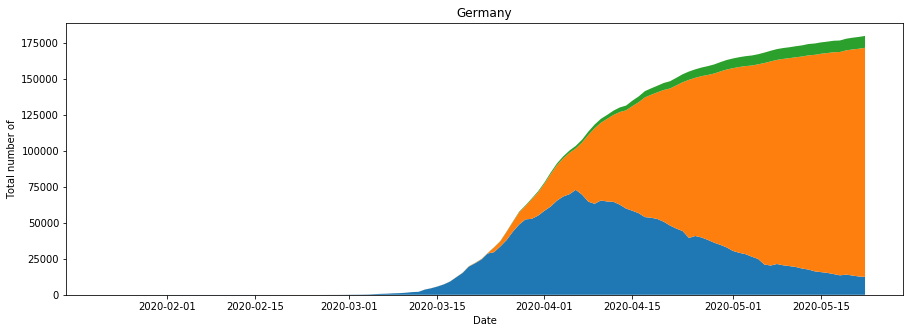

In [30]:
#gestapelte Flächen
plt.figure(figsize=(15,5))

plt.stackplot(rng, active1, recovered1, deaths1, labels= rng)

plt.title(country)
plt.xlabel("Date")
plt.ylabel("Total number of")

<function matplotlib.pyplot.show(*args, **kw)>

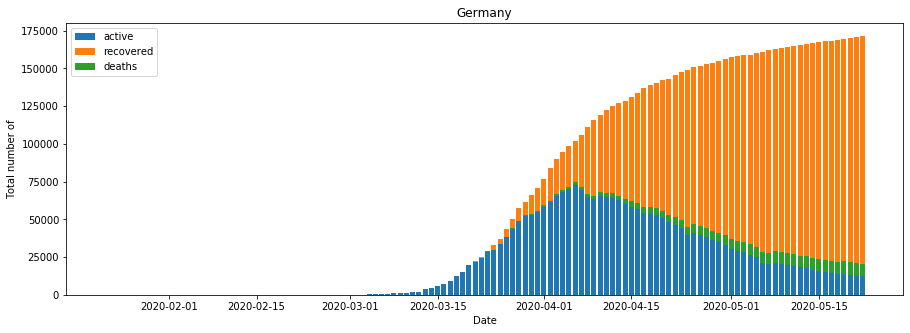

In [48]:
#Gestapelte Säulen ==> leider wollen die deaths nicht ganz nach oben. Vllt bekommt das jemand von euch hin.
#ansonsten habe ich auch Grafiken gesehen, bei denen die Sterbefälle in der Mitte sind
plt.figure(figsize=(15,5))

plt.bar(rng, active1, label = "active")
plt.bar(rng, recovered1, label = "recovered", bottom = active1)
plt.bar(rng, deaths1, label = "deaths", bottom = active1)

plt.title(country)
plt.xlabel("Date")
plt.ylabel("Total number of")
plt.legend(loc = "upper left")

plt.show